In [1]:
# Import library
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
#Load dataset
boston = load_boston()
bos_data = pd.DataFrame(boston.data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
bos_target = pd.DataFrame(boston.target,columns=['Target'])
bos_target
boston_data = pd.concat([bos_data,bos_target],axis=1)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
bos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
bos_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Data visualization & analysis on Raw Data

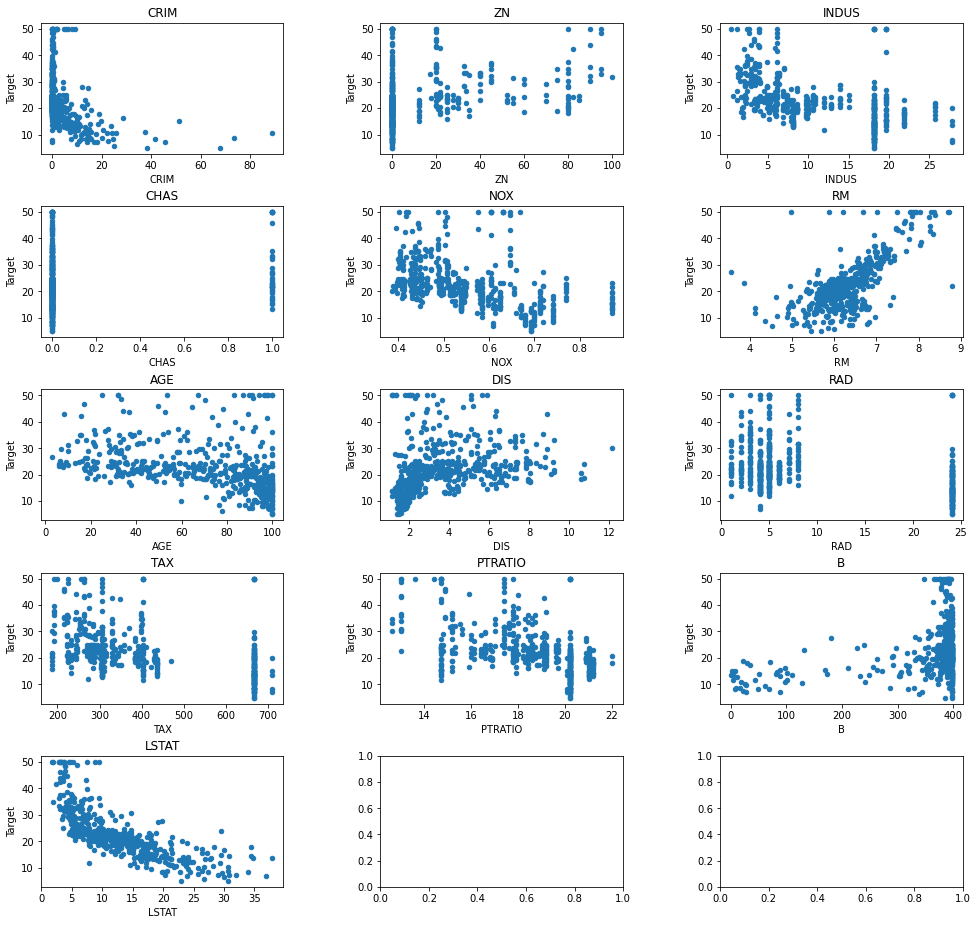

In [5]:
# Visualize the relationship between the features and the target using the scatter plot
fig, axes = plt.subplots(5,3,figsize=(16,15))
axe = axes.ravel()
for i,col in enumerate(bos_data.columns.tolist()):
    boston_data.plot(kind='scatter',x=col,y='Target',ax=axe[i], title=col)
    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)    

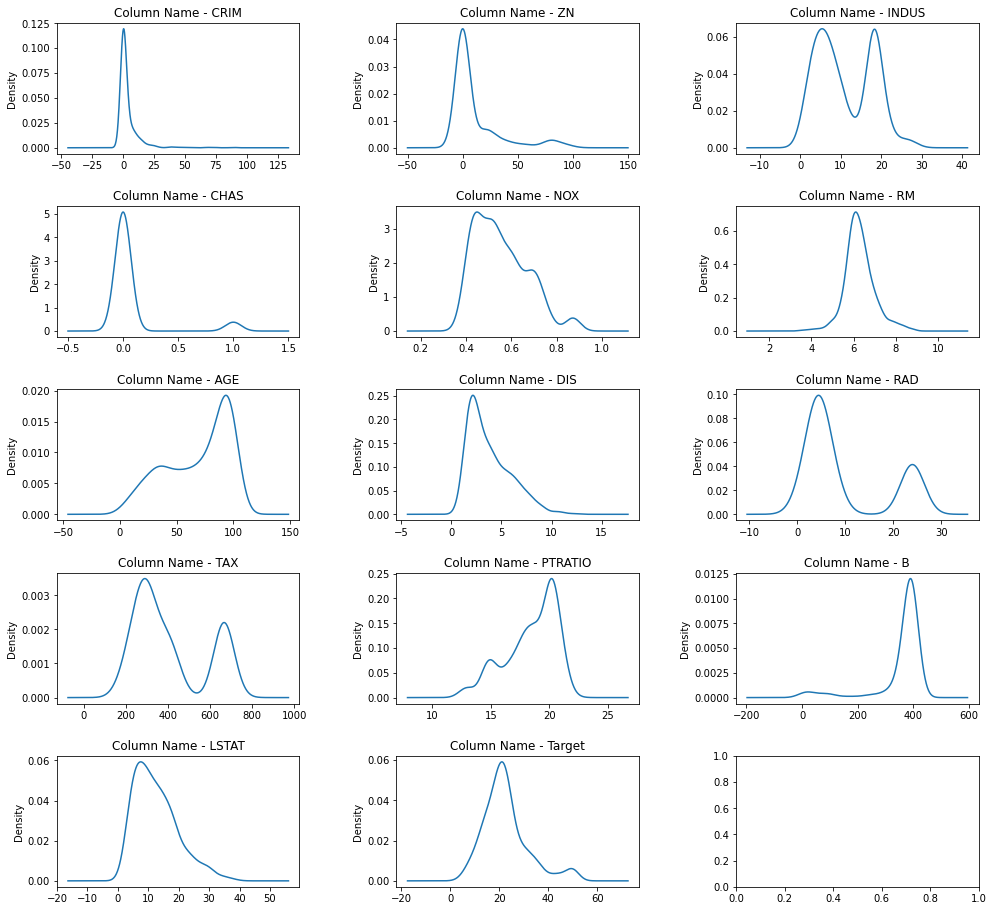

In [6]:
# Visualize the visualize the distribution for all the feature
fig, axes = plt.subplots(5,3,figsize=(16,15))
axe = axes.ravel()
for i,col in enumerate(boston_data.columns.tolist()):
    boston_data[col].plot(kind='kde',x=col,ax=axe[i],title='Column Name - {}'.format(col))

    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [7]:
# Import LinearRegression Library
from sklearn.linear_model import LinearRegression

X = bos_data
y = bos_target

In [8]:
# Impose Linear Regrassion method on Data
lr = LinearRegression()
reg = lr.fit(X,y)
print("R2 Score : ",reg.score(X,y))
print("Coeficient : ",reg.coef_)
print("Intercept : ",reg.intercept_)


R2 Score :  0.7406426641094095
Coeficient :  [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
Intercept :  [36.45948839]


In [9]:
pred = reg.predict(X)
pred

array([[30.00384338],
       [25.02556238],
       [30.56759672],
       [28.60703649],
       [27.94352423],
       [25.25628446],
       [23.00180827],
       [19.53598843],
       [11.52363685],
       [18.92026211],
       [18.99949651],
       [21.58679568],
       [20.90652153],
       [19.55290281],
       [19.28348205],
       [19.29748321],
       [20.52750979],
       [16.91140135],
       [16.17801106],
       [18.40613603],
       [12.52385753],
       [17.67103669],
       [15.83288129],
       [13.80628535],
       [15.67833832],
       [13.38668561],
       [15.46397655],
       [14.70847428],
       [19.54737285],
       [20.8764282 ],
       [11.45511759],
       [18.05923295],
       [ 8.81105736],
       [14.28275814],
       [13.70675891],
       [23.81463526],
       [22.34193708],
       [23.10891142],
       [22.91502612],
       [31.35762569],
       [34.21510225],
       [28.02056414],
       [25.20386628],
       [24.60979273],
       [22.94149176],
       [22

## Convert dataset to Standard Normal Distribution

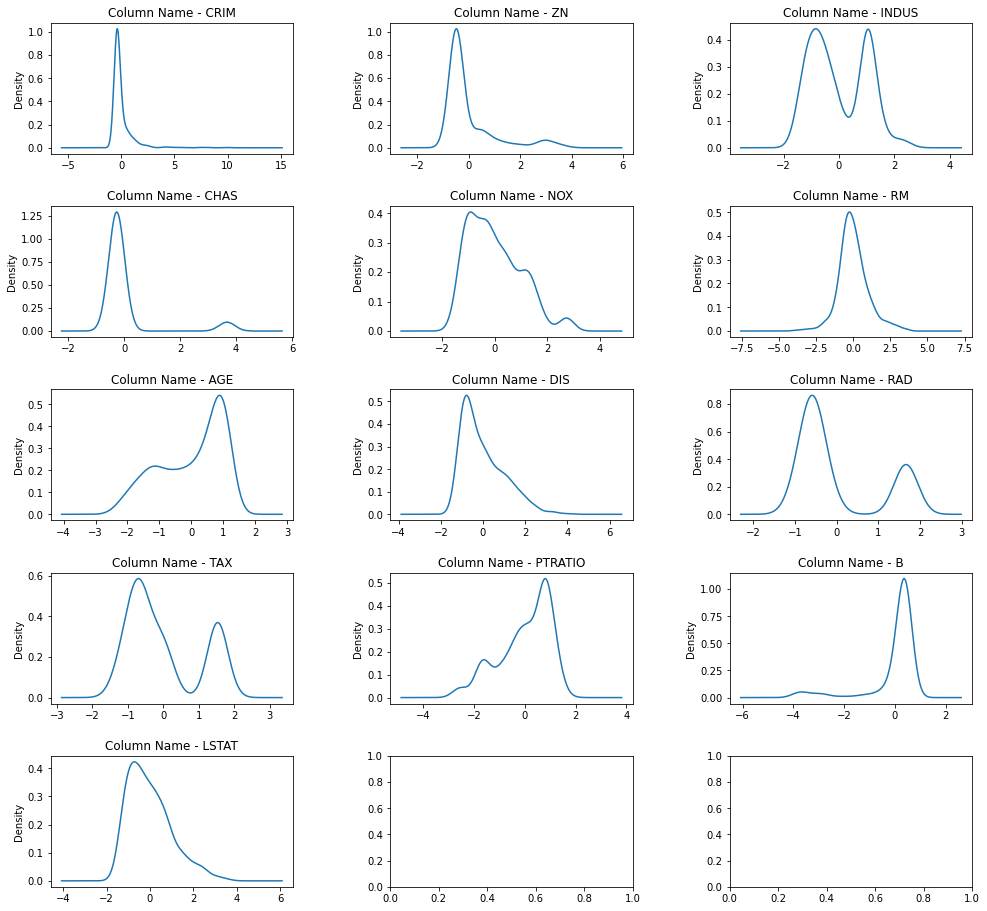

In [10]:
# Impliment Zscore to convert the data into Standard Normal Distribution

# Visualize the visualize the distribution for all the feature
fig, axes = plt.subplots(5,3,figsize=(16,15))
axe = axes.ravel()
copybos = bos_data.copy()
              
for i,col in enumerate(bos_data.columns.tolist()):
    #zc = np.round(stats.zscore(bos[col]),4)
    zc = stats.zscore(bos_data[col])
    copybos[col]=zc
    copybos[col].plot(kind='kde',x=col,ax=axe[i],title='Column Name - {}'.format(col))

    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [11]:
# Data after conversion in Standard Normal Distribution
copybos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [12]:
X = copybos.iloc[:,:12]
lr = LinearRegression()
reg = lr.fit(X,y)
print("Score : ",reg.score(X,y))
print("Coeficient : ",reg.coef_)
print("Intercept : ",reg.intercept_)

Score :  0.6842042799773889
Coeficient :  [[-1.37436351  0.90573262 -0.19136442  0.81618171 -2.37135651  4.29792216
  -1.29165672 -3.27095757  2.44932298 -1.97639725 -2.19356639  1.24228276]]
Intercept :  [22.53280632]


In [13]:
# Calculate multicoliearity between data
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
    # we create a new data frame which will include all the VIFs
    # note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
    # we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
    vif = pd.DataFrame()

    # here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    # Finally, I like to include names so it is easier to explore the result
    vif["Features"] = data.columns
    return vif

In [14]:
vif = calc_vif(copybos)
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


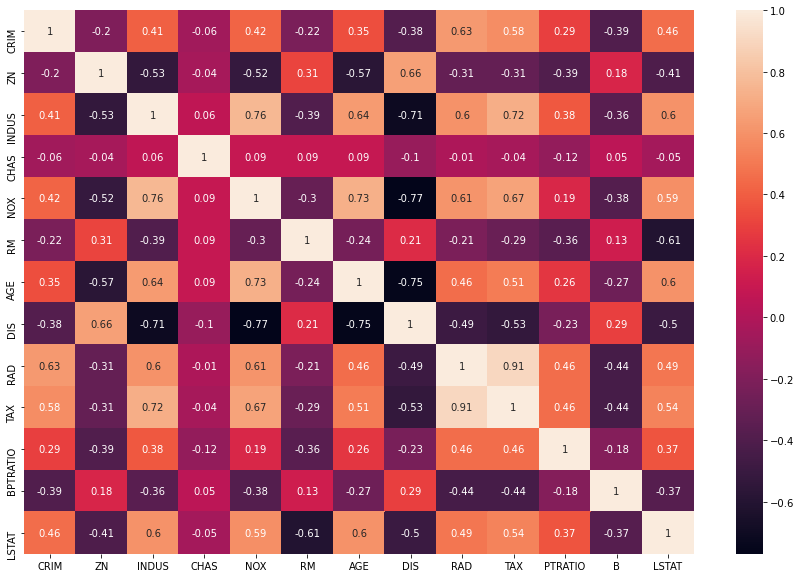

In [15]:
import seaborn as sns
plt.subplots(figsize=(15,10))
# Data correlation between independent labels before multicolinearity resolution
bos_cor = copybos.corr().round(2)
bos_cor
# annot = True to print the values inside the square
sns.heatmap(data=bos_cor, annot=True)

In [16]:
rem_x = copybos.drop(['TAX'],axis=1)
vif = calc_vif(rem_x)
vif

,VIF,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


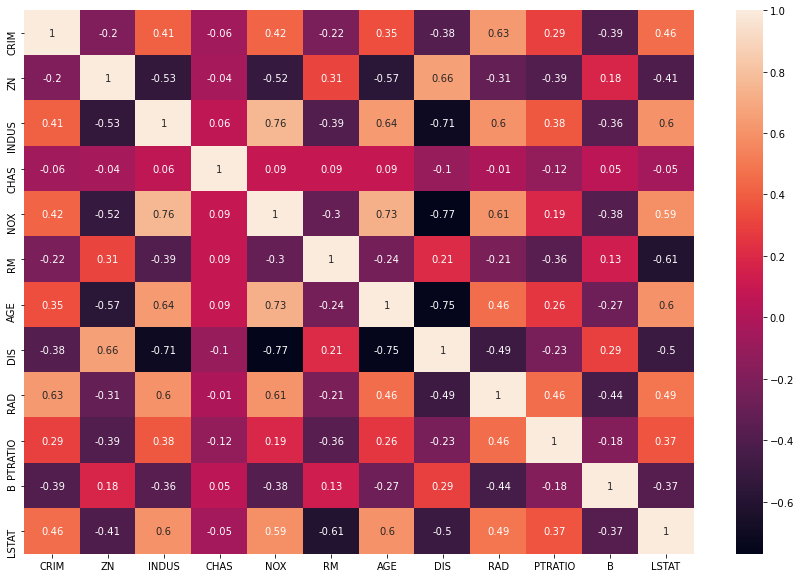

In [17]:
plt.subplots(figsize=(15,10))
# Data correlation between independent labels after multicolinearity resolution
corr_bos = copybos[vif['Features']].corr().round(2)
sns.heatmap(data=corr_bos,annot=True)

In [18]:
# Let's create a function to create adjusted R-Squared
def adj_r2(X,y):
    r2 = reg.score(X,y)
    n = X.shape[0]
    p = y.shape[1]
    adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    return adj_r2

In [19]:
# Get the data after vif analysis and removal the data
X = copybos[vif['Features']]
# Split the Data and Target into Training and Testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=355)
y_train

,Target
227,31.6
382,11.3
23,14.5
348,24.5
157,41.3
...,...
291,37.3
501,22.4
346,17.2
130,19.2


In [20]:
# Fit the training data into model
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
# Get the R Squared score for training data
reg.score(x_train,y_train)

0.7263352878677987

In [22]:
# Get the Adj R Squared score for training data
adj_r2(x_train,y_train)

0.7256093867746098

In [23]:
# Get the R Squared score for testing data
reg.score(x_test,y_test)

0.7431889797578299

In [24]:
# Get the Adj R Squared score for testing data
adj_r2(x_test,y_test)

0.7411344915958926

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Fu

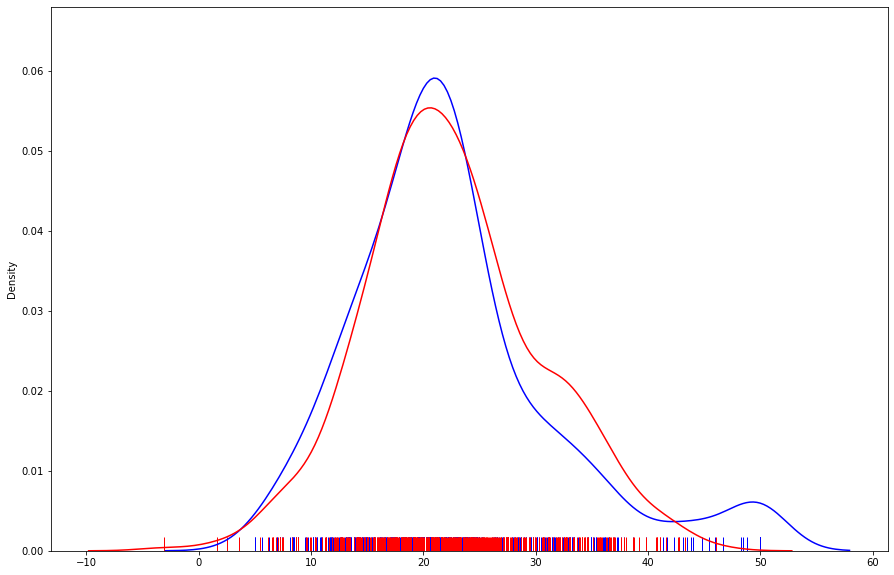

In [76]:
pred = reg.predict(X)
# Plot Target data & Predicted data in same plot
plt.subplots(figsize=(15,10))
sns.distplot(y, hist=False, rug=True, color='b')
sns.distplot(pred, hist=False, rug=True, color='r')

## Lasso Regularization

In [55]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
# LassoCV will return best alpha and coeficient after performing 10 cross validation
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=False)
lasscv.fit(x_train,y_train)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(cv=10, max_iter=100000)

In [56]:
# best parameter
alpha = lasscv.alpha_
alpha

0.006619073625418322

In [57]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.006619073625418322)

In [58]:
lasso_reg.score(x_test,y_test)

0.7432353088888131

## Ridge Regularization

In [67]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.72532644, 4.49726293, 0.35127638, 3.79669466, 1.5838989 ,
       7.96061806, 8.41416696, 5.35724762, 2.62722674, 0.83003217,
       8.06359497, 2.30799672, 7.37818022, 8.96517071, 7.31710136,
       9.07109391, 3.77731271, 1.31582419, 2.76463477, 0.10766343,
       4.369482  , 0.35459979, 7.88017652, 1.17813075, 5.70344067,
       8.43344674, 2.68030031, 8.70187828, 6.45941625, 4.58924684,
       8.85345869, 3.7478657 , 1.56134768, 4.68875659, 8.41617399,
       8.35290948, 3.51196645, 3.52528995, 5.0234819 , 7.10554859,
       0.23893377, 9.50881312, 1.3588185 , 4.81016205, 2.8115379 ,
       0.86347232, 6.05069609, 7.52458733, 1.15780094, 7.89708592]),
        cv=10, normalize=True)

In [68]:
ridgecv.alpha_

0.1076634312330027

In [69]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1076634312330027)

In [70]:
ridge_model.score(x_test,y_test)

0.7431603708743948

## Elastic net

In [71]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ElasticNetCV(cv=10)

In [72]:
elasticCV.alpha_

0.03516168118179646

In [73]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.03516168118179646)

In [74]:
elasticnet_reg.score(x_test, y_test)

0.7408474658151305

#### Conclusion :- All the regularization is giving almost same R2_score value, So it is fair to say, there is no overfitting.